In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [2]:
#Data is continuous batch wise, each batch contains 500000 samples that are continuous
#Each batch contains data that is 50 seconds long at 10 kHz
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

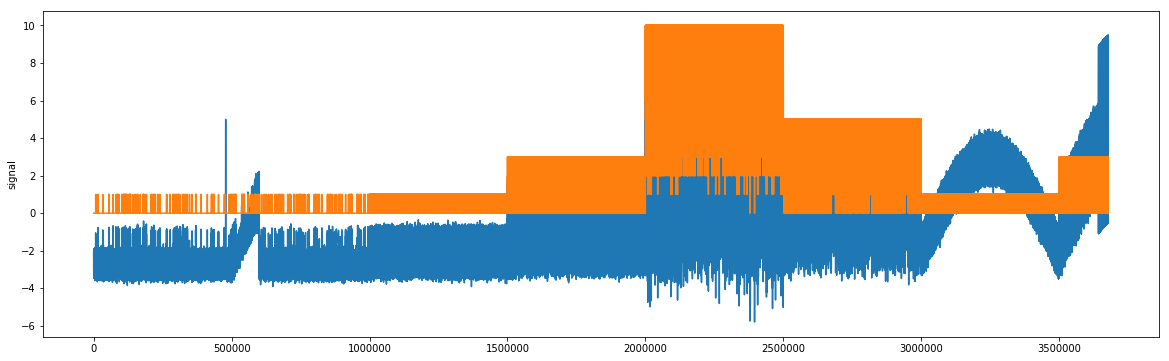

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6
#prelimanary Visualization of ION Channel opening vs Raw Signal
sns.lineplot(y=train['signal'],x=range(len(train)))
plt.plot(train['open_channels'])

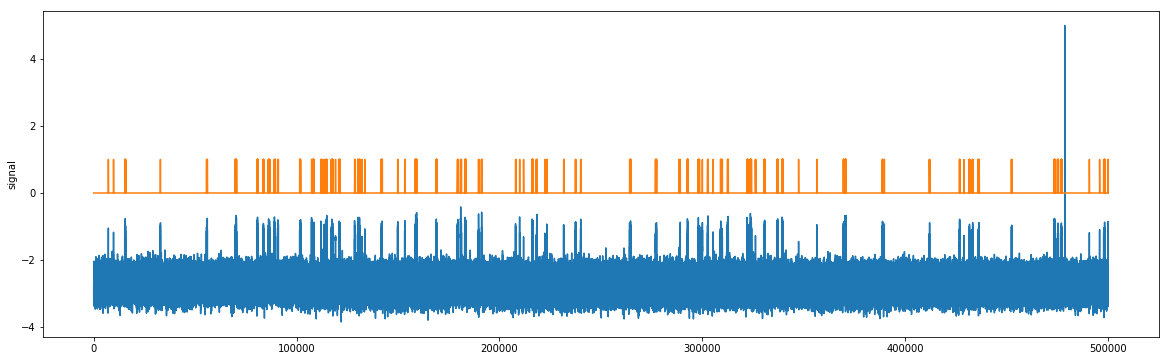

In [4]:
#Visualizing the first batch.
b_1 = train[:500000]
sns.lineplot(y=b_1['signal'],x=range(len(b_1)))
plt.plot(b_1['open_channels'])

In [5]:
#Creating an empty DataFrame for extracted features
df = pd.DataFrame(columns=['time', 'signal', 'open_channels','Rolling_signal','Residual_signal','Rolling_std'])

In [6]:
for i in range(0,len(train),500000):
    x = train[i:i+500000]
    x['Rolling_signal'] = x['signal'].rolling(1000).mean()
    x['Residual_signal'] = x['signal'] - x['Rolling_signal']
    x['Rolling_std'] = x['signal'].rolling(1000).std()
    x.fillna(method='bfill',inplace=True)
    x.fillna(method='ffill',inplace=True)
    df = df.append(x,ignore_index=True)  

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [7]:
#Creating an empty DataFrame for test set feature generation
dt = pd.DataFrame(columns=['time', 'signal', 'open_channels','Rolling_signal','Residual_signal','Rolling_std'])

In [8]:
for i in range(0,len(test),500000):
    x = test[i:i+500000]
    x['Rolling_signal'] = x['signal'].rolling(1000).mean()
    x['Residual_signal'] = x['signal'] - x['Rolling_signal']
    x['Rolling_std'] = x['signal'].rolling(1000).std()
    x.fillna(method='bfill',inplace=True)
    x.fillna(method='ffill',inplace=True)
    dt = dt.append(x,ignore_index=True)
    
    

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [9]:
X =df[['signal','Rolling_signal','Residual_signal','Rolling_std']]
y = df['open_channels']

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


rfc = RandomForestClassifier()

y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#X_test = dt[['signal','Rolling_signal','Residual_signal','Rolling_std']]

In [11]:
pred = rfc.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    406612
           1       0.98      0.98      0.98    302911
           2       0.95      0.95      0.95    116718
           3       0.96      0.95      0.96    131067
           4       0.94      0.95      0.94     67037
           5       0.91      0.92      0.92     45502
           6       0.86      0.86      0.86     30501
           7       0.86      0.87      0.87     43697
           8       0.86      0.87      0.86     40637
           9       0.85      0.86      0.86     23012
          10       0.86      0.83      0.85      6017

    accuracy                           0.96   1213711
   macro avg       0.91      0.91      0.91   1213711
weighted avg       0.96      0.96      0.96   1213711

[[403920   2325    280     23      4     13     42      2      1      2
       0]
 [  1855 298025   1687    859     68     19     96    257     19     16
      10]
 [   195   1502 110323 